# 使用块的网络（VGG）

VGG块

In [1]:
import torch
from torch import nn
from d2l import torch as d2l


def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

VGG网络

In [2]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

net = vgg(conv_arch)

观察每个层输出的形状

In [3]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [4]:
print(net)

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (4):

由于VGG-11比AlexNet计算量更大，因此我们构建了一个通道数较少的网络

In [5]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

In [6]:
small_conv_arch

[(1, 16), (1, 32), (2, 64), (2, 128), (2, 128)]

模型训练

loss 0.178, train acc 0.933, test acc 0.913
1088.9 examples/sec on cuda:0


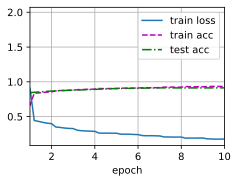

In [7]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## 练习

尝试将Fashion-MNIST数据集图像的高度和宽度从224改为96。这对实验有什么影响？

loss 0.238, train acc 0.911, test acc 0.890
5341.0 examples/sec on cuda:0


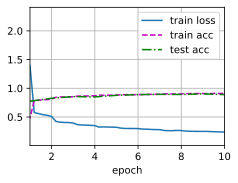

In [9]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        nn.Linear(out_channels * 3 * 3, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

请参考VGG论文 (Simonyan and Zisserman, 2014)中的表1构建其他常见模型，如VGG-16或VGG-19。

In [10]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))


VGG-13

loss 0.162, train acc 0.940, test acc 0.924
639.0 examples/sec on cuda:0


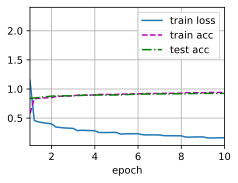

In [14]:
conv_arch = ((2, 64), (2, 128), (2, 256), (2, 512), (2, 512))

ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

VGG-16

loss 0.204, train acc 0.924, test acc 0.916
574.8 examples/sec on cuda:0


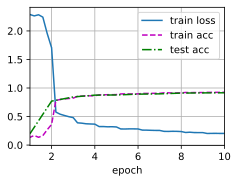

In [15]:
conv_arch = ((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))

ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

VGG-19

KeyboardInterrupt: 

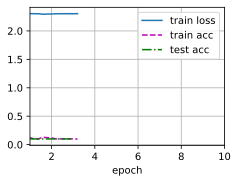

In [16]:
conv_arch = ((2, 64), (2, 128), (4, 256), (4, 512), (4, 512))

ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [54]:
torch.cuda.empty_cache()

结论：VGG-13 效果最好

| model  | epoch | train_acc | val_acc | test_acc |
| ------ | ----- | --------- | ------- | -------- |
| VGG-11 | 10    | 0.84029   | 0.81709 | 0.90820  |
| VGG-13 | 10    | 0.92594   | 0.92355 | 0.92390  |
| **VGG-13** | **20**    | 0.95039   | 0.94697 | **0.93280**  |
| VGG-13 | 30    | 0.96802   | 0.96645 | 0.93280  |
| VGG-13 | 40    | 0.98072   | 0.98028 | 0.93130  |

累计训练：

| model  | epoch  | train_acc | val_acc | test_acc | 评价   |
| ------ | ------ | --------- | ------- | -------- | ----- |
| VGG-11 | 10     | 0.88119   | 0.90148 | 0.91620  | 欠拟合 |
| VGG-13 | 10(20) | 0.94558   | 0.93707 | 0.92680  | 过拟合 |
| VGG-16 | 10(30) | 0.91256   | 0.91778 | 0.92450  | 欠拟合 |
| VGG-19 | 10(40) | 0.92911   | 0.93239 | **0.93160**  | 正常   |
|
| VGG-11 | 20     | 0.94804   | 0.94087 | 0.92960  | 过拟合 |
| VGG-13 | 20(30) | 0.97356   | 0.96295 | 0.93130  | 过拟合 |
| VGG-16 | 20(40) | 0.96350   | 0.95090 | **0.93320**  | 过拟合 |
| VGG-19 | 20(50) | 0.96944   | 0.95757 | 0.92890  | 过拟合 |

结论：
1. 需要注意防止过拟合
2. VGG-19 需要预先训练小模型，否则直接训练会梯度消失